# Stationary

Stationary data in the context of time series analysis refers to a dataset where the statistical properties do not change over time.

Stationary means time-invariant mean and nonstationary means time-varying mean.

## Main Characteristics of Stationary Data



For a time series to be truly stationary, it must exhibit:
1. **Constant Mean**: The average value of the series does not change as time progresses.
2. **Constant Variance**: The spread or variability of the series remains consistent over time.
3. **Constant Autocorrelation Structure**: How each data point relates to its predecessors remains constant over time. There's no cyclical or seasonal patterns.


## Why Stationarity is Important?

Stationarity is critical in time series analysis for several reasons:

- **Modeling and Forecasting**: Many statistical modeling techniques and forecasts are based on the assumption that past behavior can be used to predict future behavior. This is only valid if the series is stationary, meaning that the process generating the data is consistent over time.

- **Statistical Inference**: The parameters estimated from a stationary series are stable and reliable, which allows for valid statistical inference. For example, the confidence intervals calculated from such data will be meaningful and consistent.

- **Simplification**: Stationarity simplifies the complexity of working with time series data because it implies that the underlying process generating the time series is stable, making it easier to identify and model the behavior of the series.

When data are non-stationary, they often contain trends, seasonality, or other structures that can bias statistical tests and make forecasts less reliable. To address non-stationarity, data may be transformed through differencing, detrending, or other methods to stabilize the mean and variance before analysis. This makes understanding and identifying stationarity a crucial step in any time series analysis.

## Implementation


[Method 1: Visual Inspection]


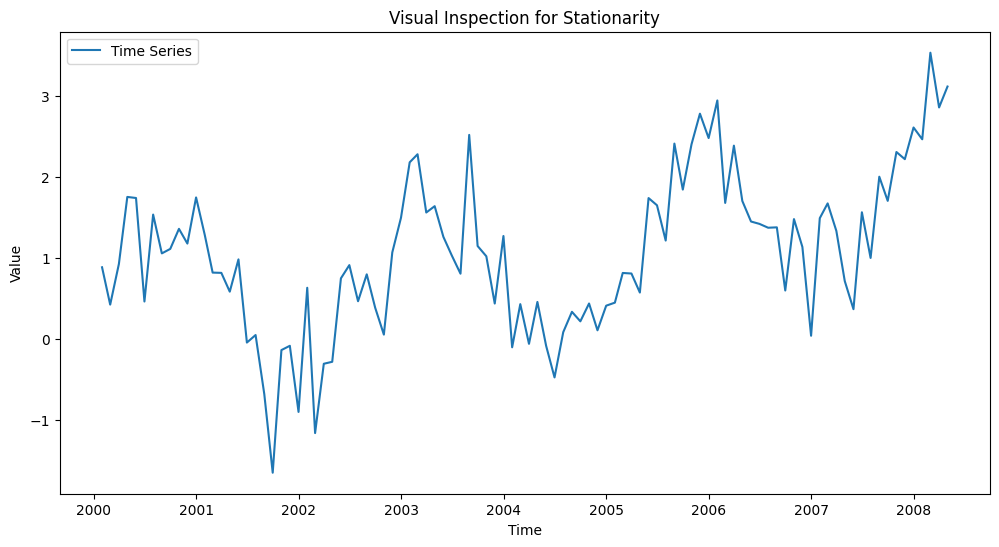


[Method 2: Global vs. Local Tests]
Means of two halves: 0.7471017090618536, 1.3802362001957347
Variances of two halves: 0.7374635187010361, 0.9485068325033262

[Method 3: Augmented Dickey-Fuller Test]
ADF Statistic: -3.0660114256883024
p-value: 0.029172900259623474
Critical Value (1%): -3.50434289821397
Critical Value (5%): -2.8938659630479413
Critical Value (10%): -2.5840147047458037


In [7]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Generate a time series with trend and seasonality
np.random.seed(0)
trend = np.linspace(0, 1, 100)
seasonal = np.sin(np.linspace(0, 20, 100))
data = 2 * trend + seasonal + np.random.normal(scale=0.5, size=100)

# Convert to pandas series and plot
ts_data = pd.Series(data, index=pd.date_range(start='2000', periods=100, freq='ME'))

# Method 1: Visual Inspection
print("\n[Method 1: Visual Inspection]")
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Time Series')
plt.title('Visual Inspection for Stationarity')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
# Comment: Visually, the time series data shows a trend and some seasonality, indicating it's likely non-stationary.

# Method 2: Global vs. Local Tests
print("\n[Method 2: Global vs. Local Tests]")
# Split data into two halves and compare the mean and variance
split = len(ts_data) // 2
first_half, second_half = ts_data[0:split], ts_data[split:]
mean1, mean2 = first_half.mean(), second_half.mean()
var1, var2 = first_half.var(), second_half.var()
print(f'Means of two halves: {mean1}, {mean2}')
print(f'Variances of two halves: {var1}, {var2}')
# Comment: If the means and variances of the two halves are significantly different, it suggests non-stationarity.

# Method 3: Augmented Dickey-Fuller Test
print("\n[Method 3: Augmented Dickey-Fuller Test]")
adf_result = adfuller(ts_data)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
for key, value in adf_result[4].items():
    print(f'Critical Value ({key}): {value}')
# Comment: ADF test will give a more formal statistical verdict. If the ADF statistic is less than the critical value and the p-value is below a threshold (commonly 0.05), we reject the null hypothesis of unit root presence, indicating stationarity. If not, the series is likely non-stationary.


### Visual Inspection for Stationarity (Method 1)

The plot shows the time series over several years. Visually, there appears to be a trend, with the value of the series generally increasing over time. This trend suggests the series is not stationary as the mean of the series is not constant.

### Global vs. Local Tests (Method 2)

The mean and variance of the two halves of the series are provided. There is a noticeable difference between the means of the two halves, and although the variances are somewhat close, the difference in means can already indicate non-stationarity. This is because stationary series should have both mean and variance roughly equal over time.

### Augmented Dickey-Fuller Test (Method 3)

The Augmented Dickey-Fuller (ADF) test is a formal statistical test for stationarity. The test results include:

- **ADF Statistic**: The value is -3.0660. For a series to be considered stationary at a 5% significance level, this statistic needs to be lower (more negative) than the critical value at 5%, which is -2.8939.
- **p-value**: The p-value is approximately 0.029, which is just below the conventional threshold of 0.05. This suggests that the null hypothesis of a unit root (indicating non-stationarity) can be rejected, but only marginally.


### Comments

Based on the visual inspection, there is an upward trend suggesting non-stationarity. The global versus local tests also suggest non-stationarity due to the different means in the two halves. However, the ADF test marginally rejects the null hypothesis of non-stationarity, suggesting that the series could be stationary. 

This mixed result could be due to a structural break, a shift in variance, or other complexities in the data. In practice, it might be considered further tests, possibly with different model specifications.

## Making a Time Series Stationary

Transforming a nonstationary series into a stationary one often involves several steps and techniques. Here are a few common methods:

### 1. Differencing

#### When to Use:

- When the series is suspected to have a **stochastic trend** or is integrated of some order (e.g., an ARIMA model with one or more levels of differencing required).
- If there's evidence of **autoregressive unit roots**—that is, the current value is a function of its previous values with a lagged effect that doesn't decay.
- When visual inspection or ACF/PACF plots show a **slow decay** indicating a nonstationary process.

#### How It is Implemented?

- Compute the differences between consecutive observations.
- This differencing process can be repeated more than once if the series is still nonstationary after the first differencing.

#### Mathematical Explanation with Sample Data

If we have a time series $ \{Y_t\} $, the first difference of the series is:

$ \Delta Y_t = Y_t - Y_{t-1} $

For example, if our nonstationary time series data is:

$ Y = [5, 7, 10, 14, 20] $

The first difference would be:

$ \Delta Y = [7-5, 10-7, 14-10, 20-14] = [2, 3, 4, 6] $

#### Python Code Example for Differencing


ADF Statistic for Original Data: 2.0712518547848764
p-value for Original Data: 0.9987586764999012
Critical Value (1%) for Original Data: -3.5078527246648834
Critical Value (5%) for Original Data: -2.895382030636155
Critical Value (10%) for Original Data: -2.584823877658872

ADF Statistic for Differenced Data: -5.467994573779887
p-value for Differenced Data: 2.4343158141954542e-06
Critical Value (1%) for Differenced Data: -3.5078527246648834
Critical Value (5%) for Differenced Data: -2.895382030636155
Critical Value (10%) for Differenced Data: -2.584823877658872


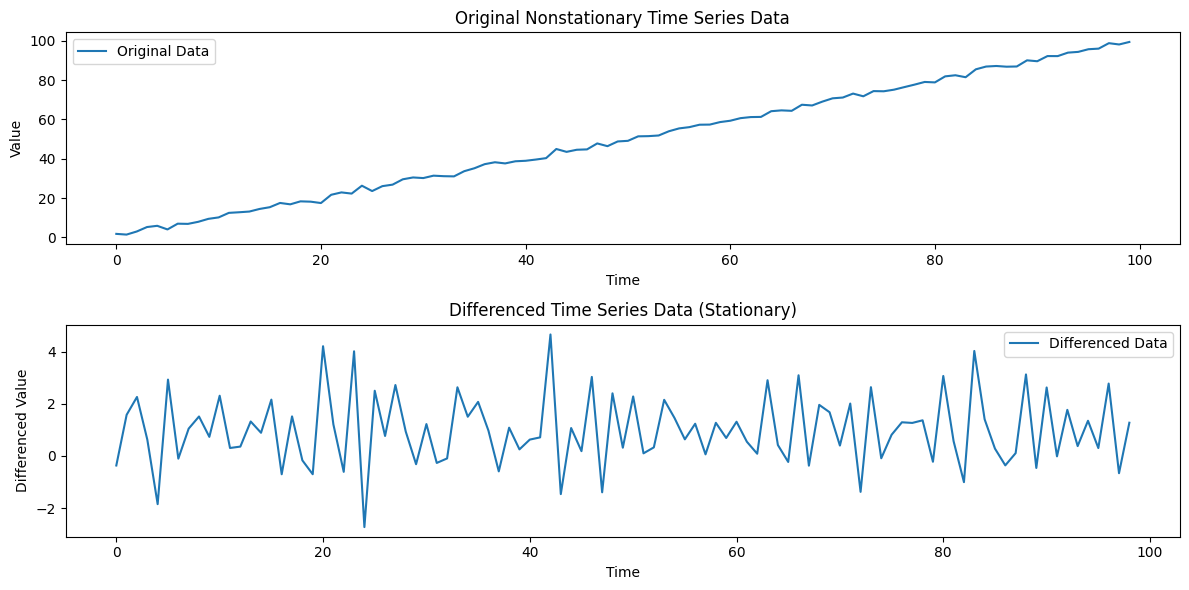

In [10]:
from statsmodels.tsa.stattools import adfuller

# Generate nonstationary time series data with a trend
np.random.seed(0)
t = np.arange(100)
data = t + np.random.normal(size=100)

# Differencing
diff_data = np.diff(data, n=1)

# Perform Augmented Dickey-Fuller test on the original data
adf_result_original = adfuller(data)

# Perform Augmented Dickey-Fuller test on the differenced data
adf_result_diff = adfuller(diff_data)

# Function to print ADF test results
def print_adf_results(adf_result, data_type):
    print(f'\nADF Statistic for {data_type}: {adf_result[0]}')
    print(f'p-value for {data_type}: {adf_result[1]}')
    for key, value in adf_result[4].items():
        print(f'Critical Value ({key}) for {data_type}: {value}')
        
# Display ADF test results for original and differenced data
print_adf_results(adf_result_original, 'Original Data')
print_adf_results(adf_result_diff, 'Differenced Data')

# Plot the original and differenced data
plt.figure(figsize=(12, 6))

# Original data plot
plt.subplot(2, 1, 1)
plt.plot(data, label='Original Data')
plt.title('Original Nonstationary Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Differenced data plot
plt.subplot(2, 1, 2)
plt.plot(diff_data, label='Differenced Data')
plt.title('Differenced Time Series Data (Stationary)')
plt.xlabel('Time')
plt.ylabel('Differenced Value')
plt.legend()

plt.tight_layout()
plt.show()


- **ADF Statistic**: A value (-5.468) is negative enough compared to the critical values, implies that the test rejected the null hypothesis of a unit root presence in the series.

- **p-value**: A high p-value (2.4343e-06) (less than 0.05) rejects the null hypothesis, suggesting that the series have stationary characteristics.

### 2. Seasonal Adjustment

#### When to Use:

- When there's a **seasonal pattern** that repeats at regular intervals, such as monthly sales data that peaks during certain months each year.
- For series where the influence of seasons or other cycles is to be separated to study the underlying trend and irregular components.
- In economic and business time series where understanding the **trend-cycle** is as important as the seasonal effect, such as analyzing retail sales data adjusted for holiday seasons.

#### How It is Implemented?

- Estimate the seasonal component of the series.
- Subtract the seasonal component from the original series to obtain the seasonally adjusted series.

#### Mathematical Explanation with Sample Data

If the series has a seasonal pattern that repeats every $ s $ periods, we can estimate the seasonal component as an average of values at the same point in each season.

For a simple example, let's say $ Y $ has a seasonal pattern with a period $ s = 4 $, we would estimate the seasonal component for each season $ i $ as:

$ S_i = \frac{1}{N} \sum_{j=0}^{N-1} Y_{(j * s) + i} $

#### Python Code Example for Seasonal Adjustment

ADF Statistic (Adjusted Data): -4.500894256002094
p-value (Adjusted Data): 0.00019590957479356243
Critical Value (1%, Adjusted Data): -3.526004646825607
Critical Value (5%, Adjusted Data): -2.9032002348069774
Critical Value (10%, Adjusted Data): -2.5889948363419957


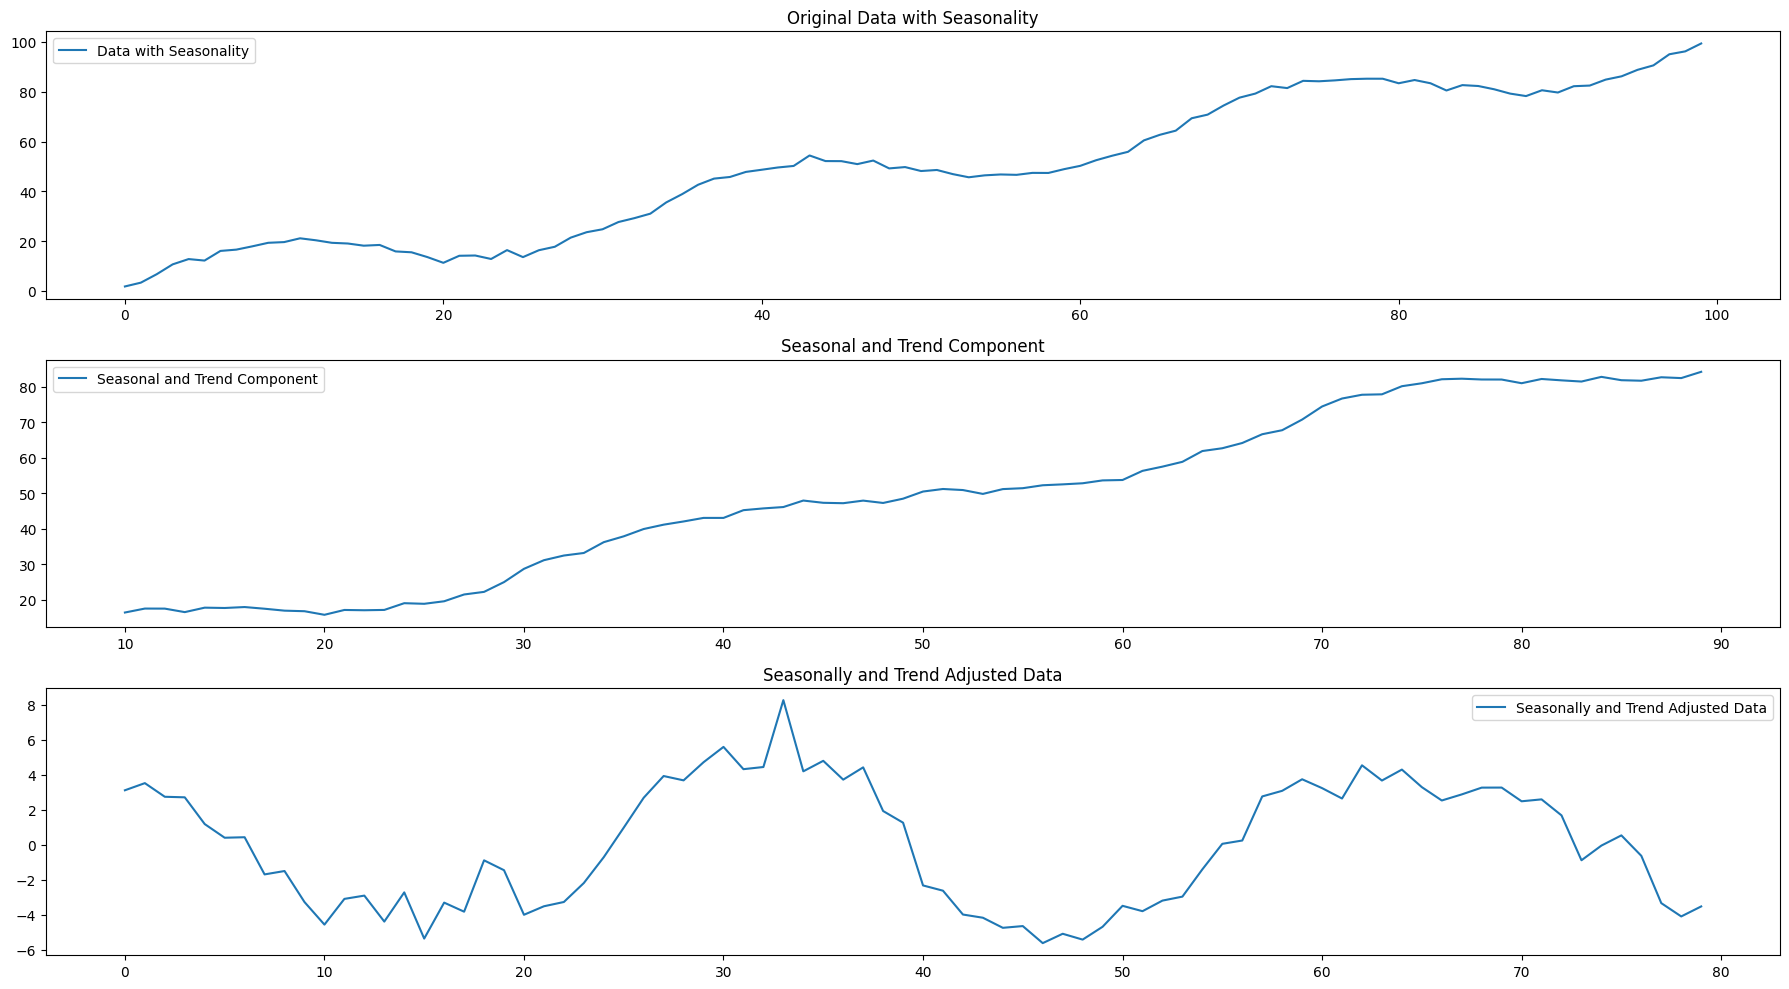

In [14]:
# Let's adjust the provided code snippet to further process the seasonally adjusted data
# to potentially achieve stationarity. We will do this by also removing the trend component after seasonal adjustment.

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np

# Generate nonstationary time series data with a trend and seasonality
np.random.seed(0)
t = np.arange(100)
seasonality = 10 * np.sin(np.linspace(0, 3 * 2 * np.pi, 100))
data_with_seasonality = t + seasonality + np.random.normal(size=100)

# Seasonal adjustment
result = seasonal_decompose(data_with_seasonality, period=20, model='additive')
adjusted_data = data_with_seasonality - result.seasonal - result.trend

# It's possible the subtraction above may lead to NaN values at the start or end of the series
# due to the way seasonal_decompose handles edges. We can drop NaN values like this:
adjusted_data = adjusted_data[~np.isnan(adjusted_data)]

# Perform Augmented Dickey-Fuller test on the seasonally and trend adjusted data
adf_result_adjusted = adfuller(adjusted_data)

# Print ADF test results for seasonally and trend adjusted data
print(f'ADF Statistic (Adjusted Data): {adf_result_adjusted[0]}')
print(f'p-value (Adjusted Data): {adf_result_adjusted[1]}')
for key, value in adf_result_adjusted[4].items():
    print(f'Critical Value ({key}, Adjusted Data): {value}')

# Plot original, seasonally adjusted, and trend adjusted data
plt.figure(figsize=(18, 10))

plt.subplot(3, 1, 1)
plt.plot(data_with_seasonality, label='Data with Seasonality')
plt.title('Original Data with Seasonality')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(result.seasonal + result.trend, label='Seasonal and Trend Component')
plt.title('Seasonal and Trend Component')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(adjusted_data, label='Seasonally and Trend Adjusted Data')
plt.title('Seasonally and Trend Adjusted Data')
plt.legend()

plt.tight_layout()
plt.show()

- **ADF Statistic**: A value (-4.50) is negative enough compared to the critical values, implies that the test rejected the null hypothesis of a unit root presence in the series.

- **p-value**: A high p-value (0.000195) (less than 0.05) rejects the null hypothesis, suggesting that the series have stationary characteristics.
